# **1. Adult Income Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income']

In [3]:
train_df = pd.read_csv("Adult Income Dataset/adult.data", names=columns, sep=",\s", engine="python")
test_df = pd.read_csv("Adult Income Dataset/adult.test", names=columns, sep=",\s", engine="python")

In [4]:
train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **Check dataset info (Total column, row, numeric & categorical features)**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education_num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [8]:
train_df_len = len(train_df)
test_df_len = len(test_df)

print("Total row (Train) : ", train_df_len)
print("Total row (Test) : ", test_df_len)

Total row (Train) :  32561
Total row (Test) :  16282


In [9]:
import pandas as pd

def print_feature_types(df, dataset_name):
    numeric_int_features = df.select_dtypes(include="int").columns.tolist()
    numeric_float_features = df.select_dtypes(include="float").columns.tolist()
    categorical_features = df.select_dtypes(include="object").columns.tolist()

    if numeric_int_features:
        print(f"Integer Numeric features ({dataset_name}): {', '.join(numeric_int_features)}")
    else:
        print(f"No integer numeric features found in {dataset_name}.")

    if numeric_float_features:
        print(f"Float Numeric features ({dataset_name}): {', '.join(numeric_float_features)}")
    else:
        print(f"No float numeric features found in {dataset_name}.")

    if categorical_features:
        print(f"Categorical features ({dataset_name}): {', '.join(categorical_features)}")
    else:
        print(f"No categorical features found in {dataset_name}.")

    print()

print_feature_types(train_df, "Train")
print_feature_types(test_df, "Test")


Integer Numeric features (Train): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
No float numeric features found in Train.
Categorical features (Train): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

No integer numeric features found in Test.
Float Numeric features (Test): fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
Categorical features (Test): age, workclass, education, marital_status, occupation, relationship, race, sex, native_country, income



#### **Adult Income Dataset Features and Data Types**

> The Adult Income Dataset contains demographic information about individuals, aiming to predict whether their income exceeds $50,000 per year. Below is a summary of the features along with their corresponding data types:

| Feature          | Data Type   | Description                                             |
|------------------|-------------|---------------------------------------------------------|
| **age**          | `int`       | The age of the individual.                              |
| **workclass**    | `object`    | The category of work (e.g., Private, Self-emp-not-inc, Government, etc.). |
| **fnlwgt**       | `int`       | The final weight assigned to the individual in the survey. |
| **education**     | `object`    | The level of education attained (e.g., Bachelors, Masters, HS-grad, etc.). |
| **education_num** | `int`       | Numeric code representing the level of education (e.g., 13 for Bachelors). |
| **marital_status**| `object`    | The marital status of the individual (e.g., Married-civ-spouse, Divorced, Never-married, etc.). |
| **occupation**   | `object`    | The occupation of the individual (e.g., Tech-support, Craft-repair, Sales, etc.). |
| **relationship** | `object`    | The relationship status of the individual (e.g., Husband, Not-in-family, Own-child, etc.). |
| **race**         | `object`    | The race of the individual (e.g., White, Asian-Pac-Islander, Black, etc.). |
| **sex**          | `object`    | The gender of the individual (Male or Female).         |
| **capital_gain** | `int`       | The capital gain of the individual.                    |
| **capital_loss** | `int`       | The capital loss of the individual.                    |
| **hours_per_week**| `int`      | The number of hours the individual works per week.     |
| **native_country**| `object`   | The country of origin of the individual (e.g., United States, Mexico, etc.). |
| **income**       | `object`    | The income label of the individual (<=50K or >50K).    |

#### **Summary of Data Types**
- **Numeric (`int`)**: age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
- **Categorical (`object`)**: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

#### **Data Type Verification in Train and Test DataFrames**

> After checking the data types in the `train_df` and `test_df` DataFrames, it was found that some features have incorrect data types. Specifically:

- In `test_df`: 
  - **age** is of type `object`, but it should be of type `int`.
  - **fnlwgt** is of type `float64`, but it should be of type `int`
  - **education_num** is of type `float64`, but it should be of type `int`
  - **capital_gain** is of type `float64`, but it should be of type `int`
  - **capital_loss** is of type `float64`, but it should be of type `int`
  - **hours_per_week** is of type `float64`, but it should be of type `int`

> Therefore, it is necessary to convert the features with incorrect data types before proceeding further.

In [10]:
test_df = test_df.drop(index=0).reset_index(drop=True)
test_df['age'] = pd.to_numeric(test_df['age'], errors='coerce').astype('Int64')
test_df['fnlwgt'] = test_df['fnlwgt'].astype('Int64')
test_df['education_num'] = test_df['education_num'].astype('Int64')
test_df['capital_gain'] = test_df['capital_gain'].astype('Int64')
test_df['capital_loss'] = test_df['capital_loss'].astype('Int64')
test_df['hours_per_week'] = test_df['hours_per_week'].astype('Int64')

In [11]:
print_feature_types(train_df, "Train")
print_feature_types(test_df, "Test")

Integer Numeric features (Train): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
No float numeric features found in Train.
Categorical features (Train): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

Integer Numeric features (Test): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
No float numeric features found in Test.
Categorical features (Test): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income



> After correcting the data type of the `age, fnlwgt, education_num, capital_gain, capital_loss & hours_per_week` column in the `test_df` DataFrame, it is now ready for the next processing steps.

### **Check for Missing Values, Duplicates, and Handle the Data**

In [12]:
def check_missing_and_duplicates(df, dataset_name):
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    
    if total_missing > 0:
        print(f"Missing values in {dataset_name}:")
        print(missing_values[missing_values > 0])
    else:
        print(f"No missing values found in {dataset_name}.")

    duplicate_count = df.duplicated().sum()
    
    if duplicate_count > 0:
        print(f"Duplicate rows in {dataset_name}: {duplicate_count}")
    else:
        print(f"No duplicates found in {dataset_name}.")


In [13]:
check_missing_and_duplicates(train_df, "Train")

No missing values found in Train.


Duplicate rows in Train: 24


In [14]:
check_missing_and_duplicates(test_df, "Test")

No missing values found in Test.
Duplicate rows in Test: 5


> It appears that there are 24 duplicate rows in `train_df` and 5 duplicate rows in `test_df`. Next, let's examine the specific data that is duplicated in these DataFrames.

In [15]:
def display_duplicate(df, dataset_name):
    duplicate_mask = df.duplicated(keep=False)
    duplicates = df[duplicate_mask]

    if not duplicates.empty:
        print(f"Unique groups of duplicate rows in {dataset_name}:\n")
        unique_duplicates = duplicates.drop_duplicates()
        display(unique_duplicates)
    else:
        print(f"No duplicate rows found in {dataset_name}.")

In [16]:
display_duplicate(train_df, "Train")

Unique groups of duplicate rows in Train:



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [17]:
display_duplicate(test_df, "Test")

Unique groups of duplicate rows in Test:



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.
7021,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
9249,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.


After that, remove the duplicate values.

In [18]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [19]:
check_missing_and_duplicates(train_df, "Train")

No missing values found in Train.
No duplicates found in Train.


In [20]:
check_missing_and_duplicates(test_df, "Test")

No missing values found in Test.
No duplicates found in Test.


> After completing the processes of checking for missing values, handling duplicates, and addressing the data, we are ready to move on to the next step.

#### **Check Unique Values Across All Features**

In [21]:
def check_unique_values(df, dataset_name):
    print(f"Unique values in {dataset_name} DataFrame:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nFeature: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print("Unique values:", unique_values)

In [22]:
check_unique_values(train_df, "Train")

Unique values in Train DataFrame:

Feature: age
Number of unique values: 73
Unique values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Feature: workclass
Number of unique values: 9
Unique values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature: fnlwgt
Number of unique values: 21648
Unique values: [ 77516  83311 215646 ...  34066  84661 257302]

Feature: education
Number of unique values: 16
Unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Feature: education_num
Number of unique values: 16
Unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Feature: marital_status
Number of unique v

In [23]:
check_unique_values(test_df, "Test")

Unique values in Test DataFrame:

Feature: age
Number of unique values: 73
Unique values: <IntegerArray>
[25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20, 37, 40,
 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30, 47, 41, 19, 69,
 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77, 80, 62, 35, 68, 66, 75,
 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85, 76, 84, 89, 88, 87]
Length: 73, dtype: Int64

Feature: workclass
Number of unique values: 9
Unique values: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature: fnlwgt
Number of unique values: 12787
Unique values: <IntegerArray>
[226802,  89814, 336951, 160323, 103497, 198693, 227026, 104626, 369667,
 104996,
 ...
 269623, 139347, 224655, 173449,  89686, 440129, 350977, 349230, 321403,
  83891]
Length: 12787, dtype: Int64

Feature: education
Number of unique values: 16
Unique values: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Pr

#### **Removing Unique Values That Do Not Match**

> After reviewing the unique values, it is evident that several features contain the value `?`. These need to be removed. Below are the details:

**train_df**
- `?` in workclass
- `?` in occupation
- `?` in native_country

**test_df**
- `?` in workclass
- `?` in occupation
- `?` in native_country

In [24]:
def remove_question_marks(df):
    df.replace("?", np.nan, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [25]:
train_df = remove_question_marks(train_df)
test_df = remove_question_marks(test_df)

### **Analysis Statistics of Distribution and Correlation in the Data**

In [26]:
def analyze_numeric_correlation(df):
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    return correlation_matrix.round(2)

In [27]:
analyze_numeric_correlation(train_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.00,-0.08,0.04,0.08,0.06,0.10
fnlwgt,-0.08,1.00,-0.05,0.00,-0.01,-0.02
education_num,0.04,-0.05,1.00,0.12,0.08,0.15
capital_gain,0.08,0.00,0.12,1.00,-0.03,0.08
capital_loss,0.06,-0.01,0.08,-0.03,1.00,0.05
hours_per_week,0.10,-0.02,0.15,0.08,0.05,1.00


In [28]:
analyze_numeric_correlation(test_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.00,-0.07,0.03,0.08,0.06,0.10
fnlwgt,-0.07,1.00,-0.04,-0.01,0.01,-0.01
education_num,0.03,-0.04,1.00,0.13,0.09,0.13
capital_gain,0.08,-0.01,0.13,1.00,-0.03,0.09
capital_loss,0.06,0.01,0.09,-0.03,1.00,0.06
hours_per_week,0.10,-0.01,0.13,0.09,0.06,1.00


In [29]:
def analyze_numerical_features(df):
    descriptive_stats = df.describe()
    return descriptive_stats.round(2)

In [30]:
analyze_numerical_features(train_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30139.00,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,1092.84,88.44,40.93
std,13.13,105658.62,2.55,7409.11,404.45,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117627.50,9.00,0.00,0.00,40.00
50%,37.00,178417.00,10.00,0.00,0.00,40.00
75%,47.00,237604.50,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [31]:
analyze_numerical_features(test_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15055.0,15055.0,15055.0,15055.0,15055.0,15055.0
mean,38.77,189623.4,10.11,1120.67,89.07,40.95
std,13.38,105608.09,2.56,7704.43,406.35,12.06
min,17.0,13492.0,1.0,0.0,0.0,1.0
25%,28.0,116657.0,9.0,0.0,0.0,40.0
50%,37.0,177955.0,10.0,0.0,0.0,40.0
75%,48.0,238589.5,13.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,3770.0,99.0


### **Visualization of Distribution and Correlation in the Data**

#### **Check Correlation Between Features**

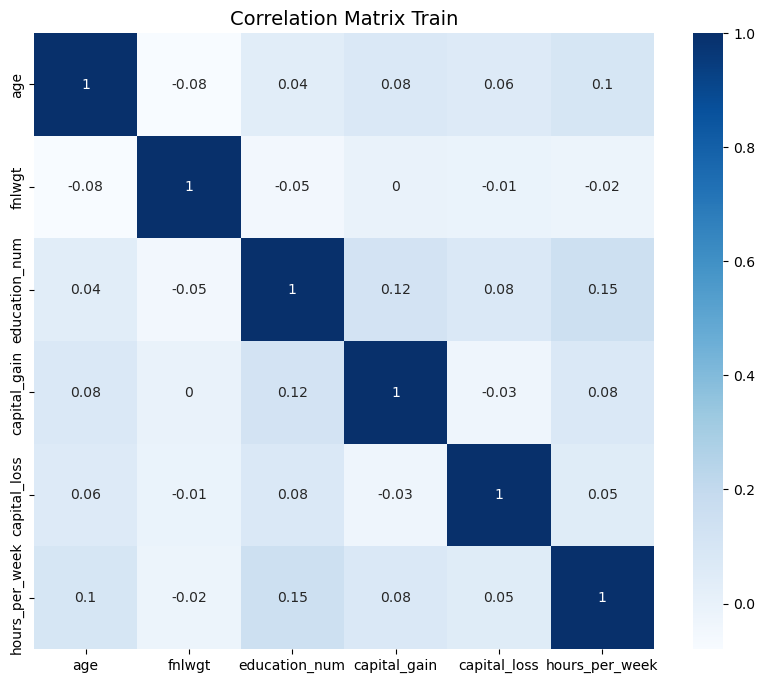

In [32]:
numeric_columns = train_df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix Train", size=14)
plt.show()

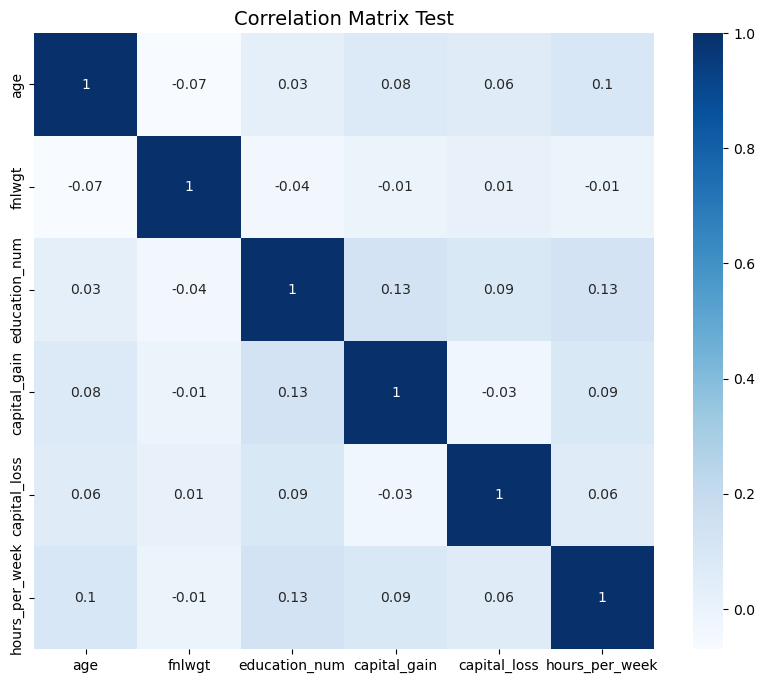

In [33]:
numeric_columns = test_df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix Test", size=14)
plt.show()

#### **Check Distribution Numerical & Categorical Features**

In [34]:
def plot_numerical_distribution(df, dataset_name="Dataset"):
    numerical_features = df.select_dtypes(include='number').columns.tolist()
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature} in {dataset_name}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(df, top_n=10, dataset_name="Dataset"):
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(categorical_features, 1):
        top_categories = df[feature].value_counts().nlargest(top_n).index
        
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=feature, order=top_categories)

        unique_count = df[feature].nunique()
        title = f'Distribution of {feature}'
        
        if unique_count >= top_n:
            title += f' (Top {top_n})'

        plt.title(f'{title} in {dataset_name}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()


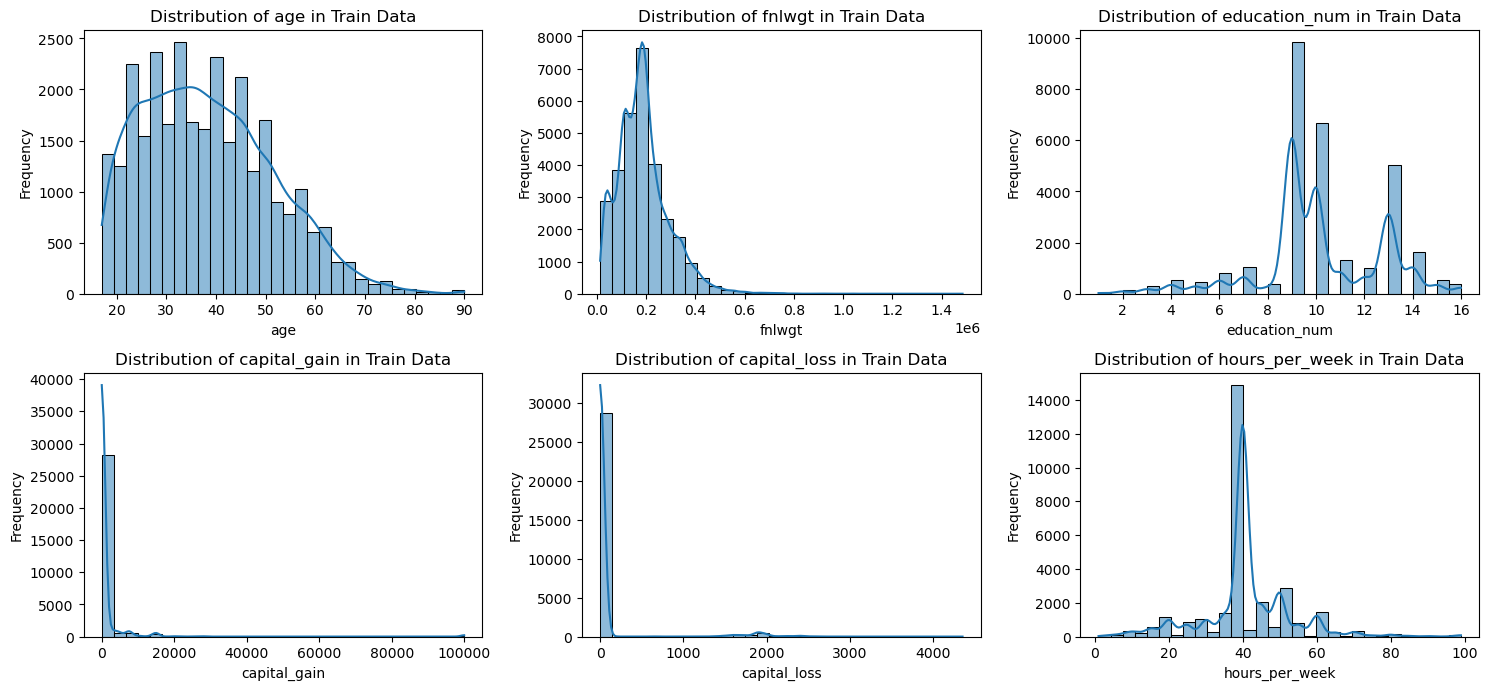

In [35]:
plot_numerical_distribution(train_df, dataset_name="Train Data")

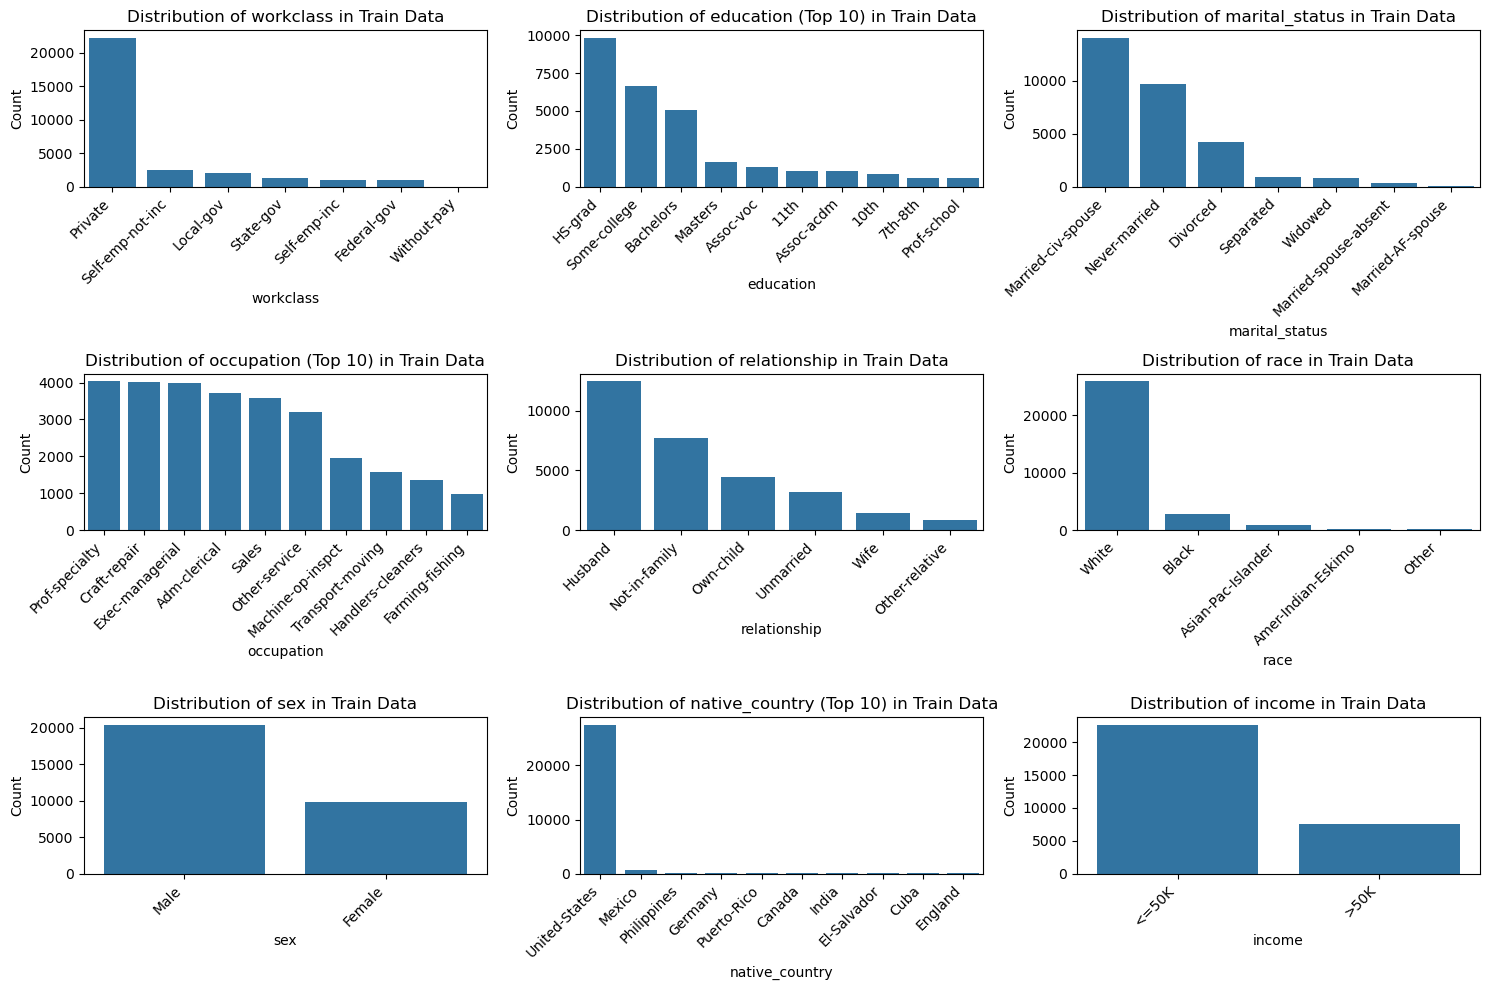

In [36]:
plot_categorical_distribution(train_df, top_n=10, dataset_name="Train Data")

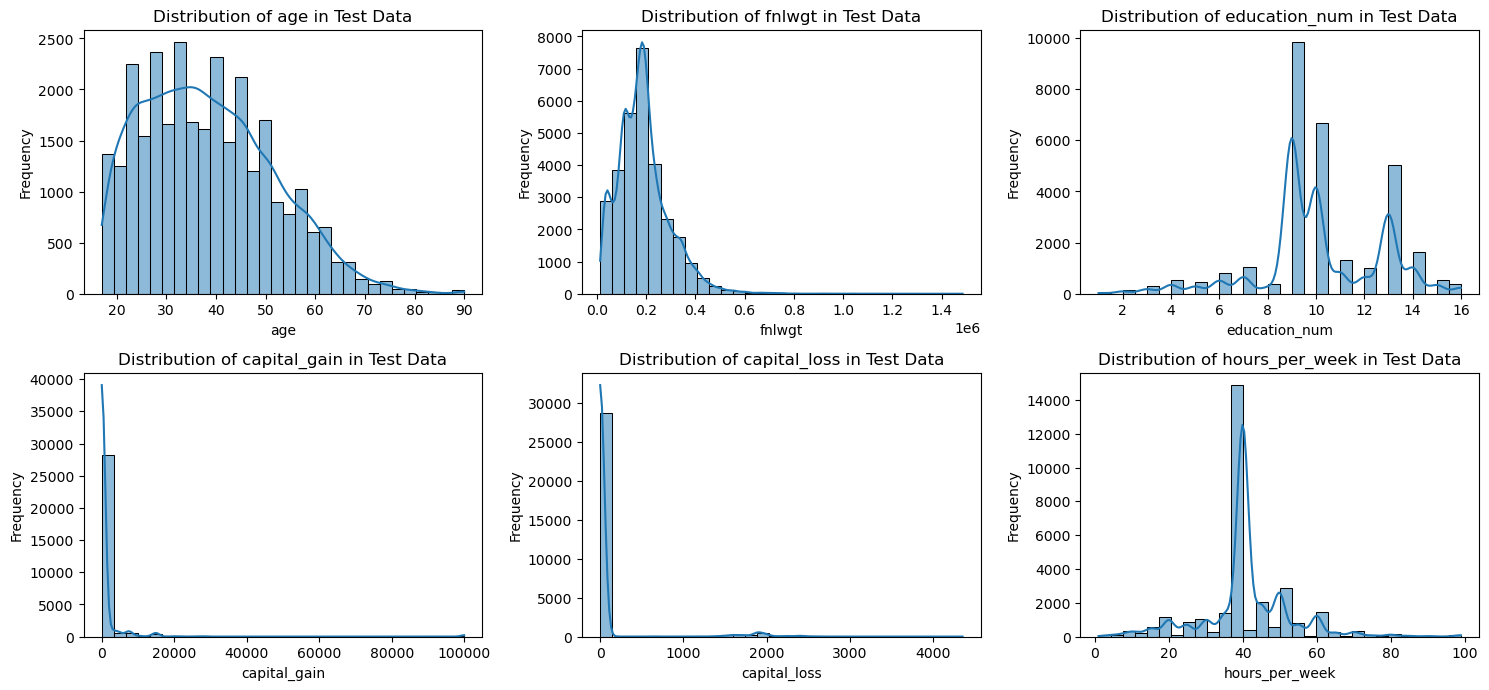

In [37]:
plot_numerical_distribution(train_df, dataset_name="Test Data")

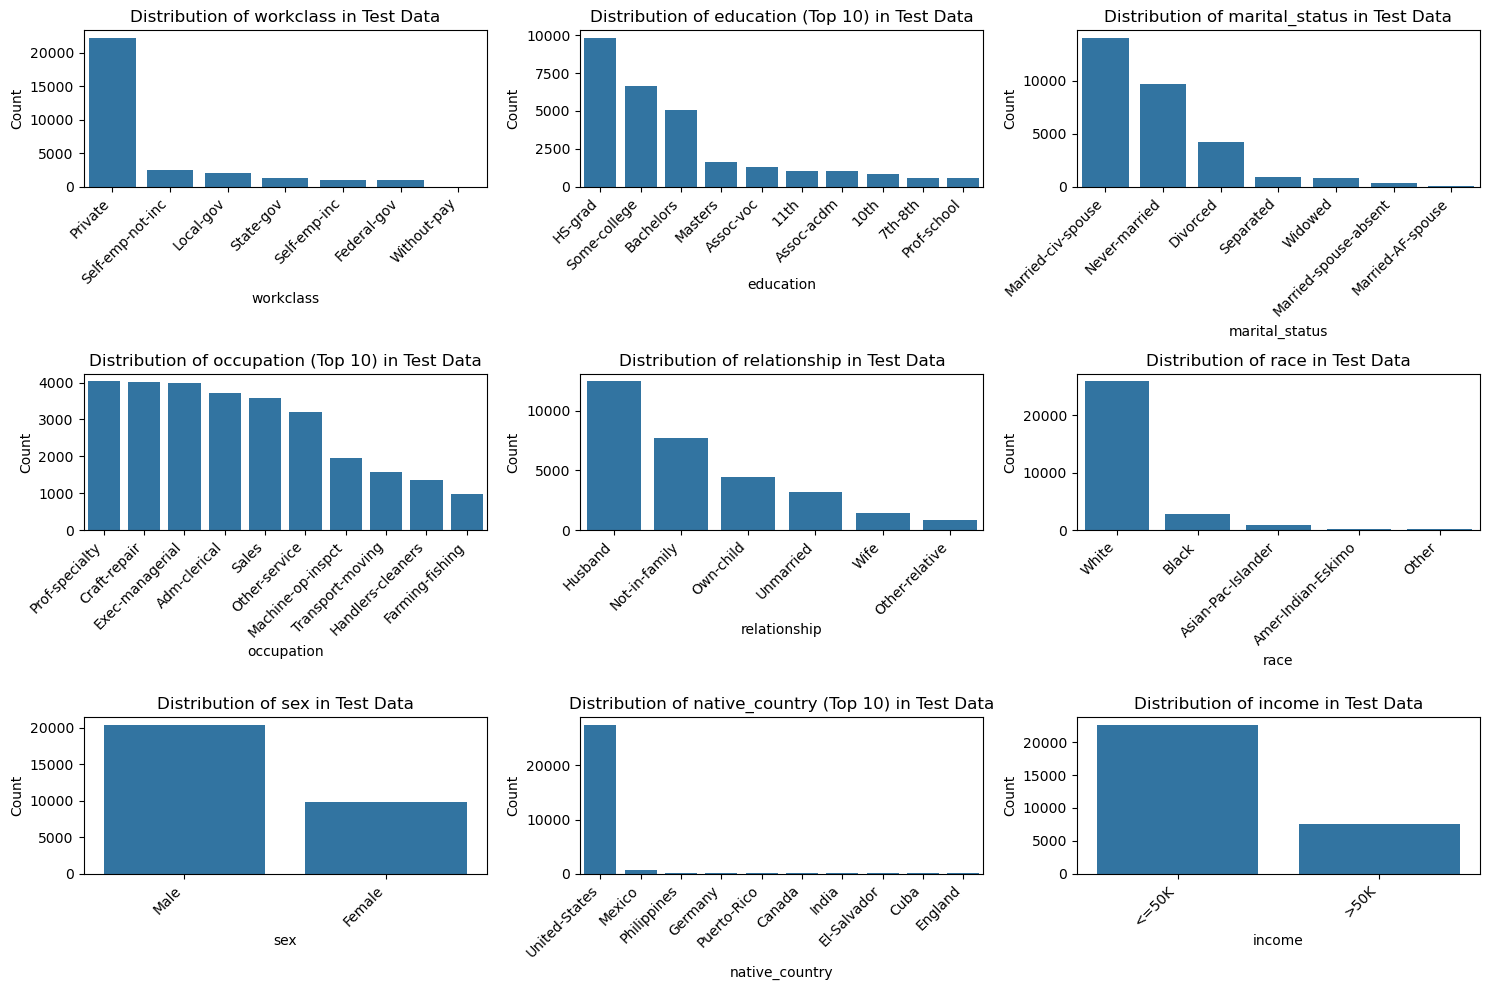

In [38]:
plot_categorical_distribution(train_df, top_n=10, dataset_name="Test Data")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

### **Checking and Handling Outliers in the Data**

#### **Check for Outliers**

In [39]:
def plot_outliers(df):
    numerical_features = df.select_dtypes(include="number").columns.tolist()

    plt.figure(figsize=(15,10))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, x=feature)
        plt.title(f"Outlier in {feature}")
        plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

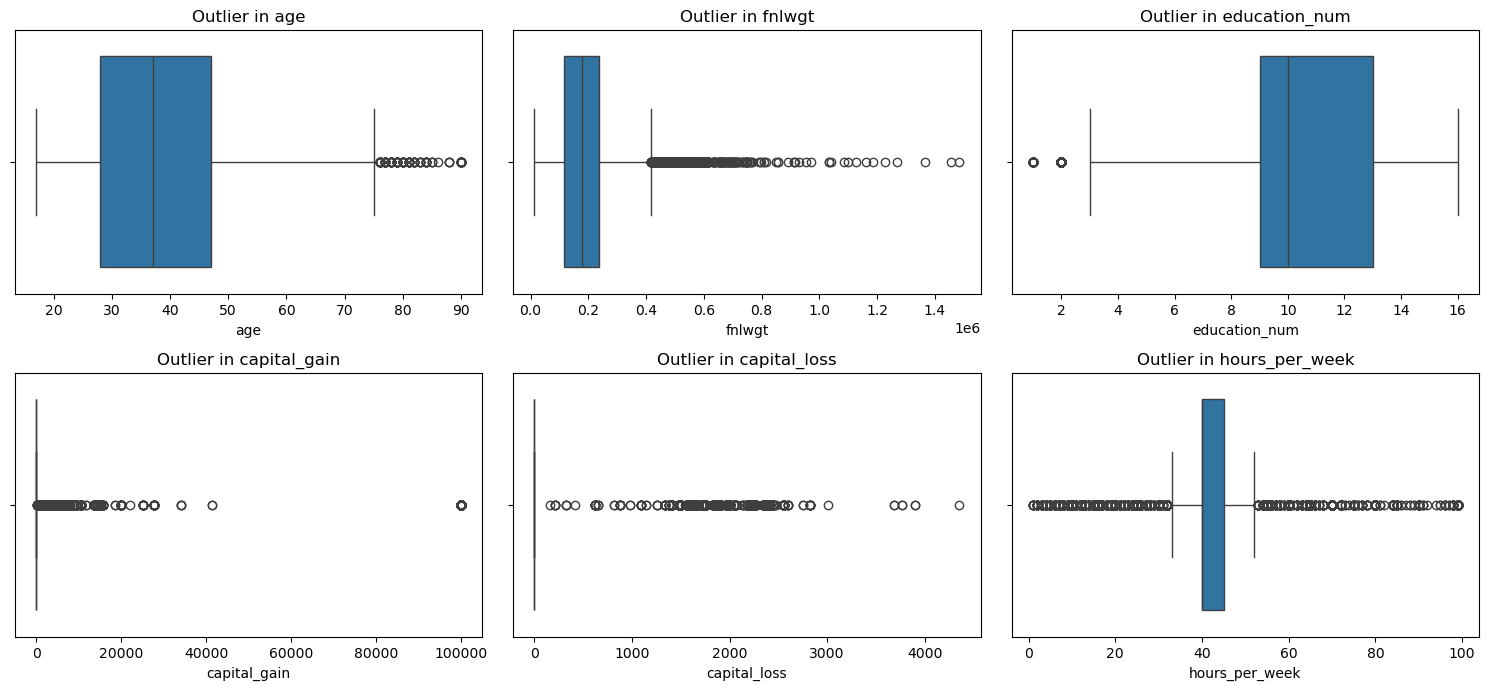

In [40]:
plot_outliers(train_df)

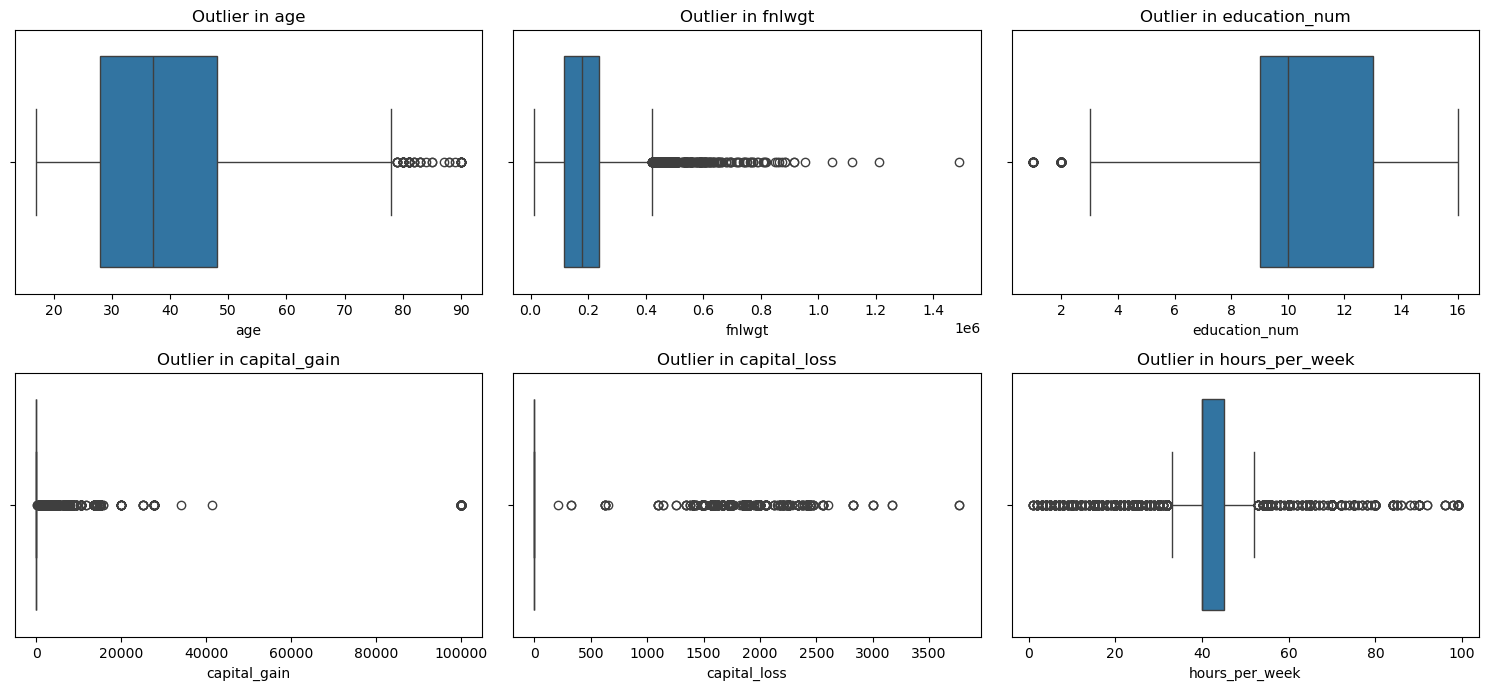

In [41]:
plot_outliers(test_df)

> It can be observed from the box plot that there are many outliers present. Before removing these outliers, it is essential to first determine whether they are genuinely errors in the data by checking the normal range for each feature and analyzing that range.

- `age` normal range: 17 - 90 years
- `fnlwgt` normal range: varies, so there are no clear outlier values
- `education_num` normal range: 1 - 16 years
- `capital_gain`: typically 0; if the value is very high, it may be an outlier
- `capital_loss`: typically 0 as well; if the value is very high, it may be an outlier
- `hours_per_week`: 1 - 99 hours per week

> Based on the results of this analysis, it can be confirmed that outliers exist in the capital_gain and capital_loss data. To address this, imputation techniques will be used to replace the outliers with the minimum or maximum limits of the interquartile range (IQR).

#### **Imputation Technique for Replacing Outliers**

In [42]:
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mean_value = df[column].mean()

        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

In [43]:
columns_to_replace = ['capital_gain', 'capital_loss']
replace_outliers_with_mean(train_df, columns_to_replace)
replace_outliers_with_mean(test_df, columns_to_replace)

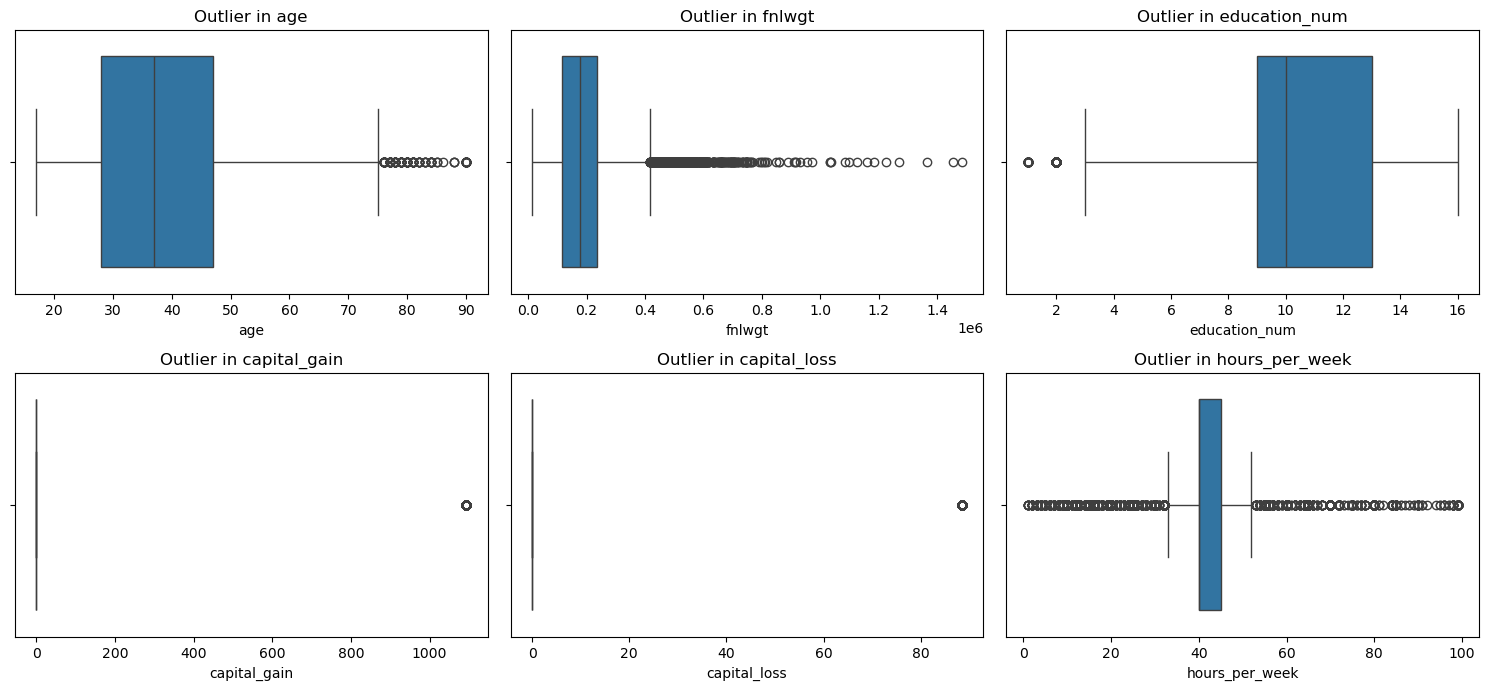

In [44]:
plot_outliers(train_df)

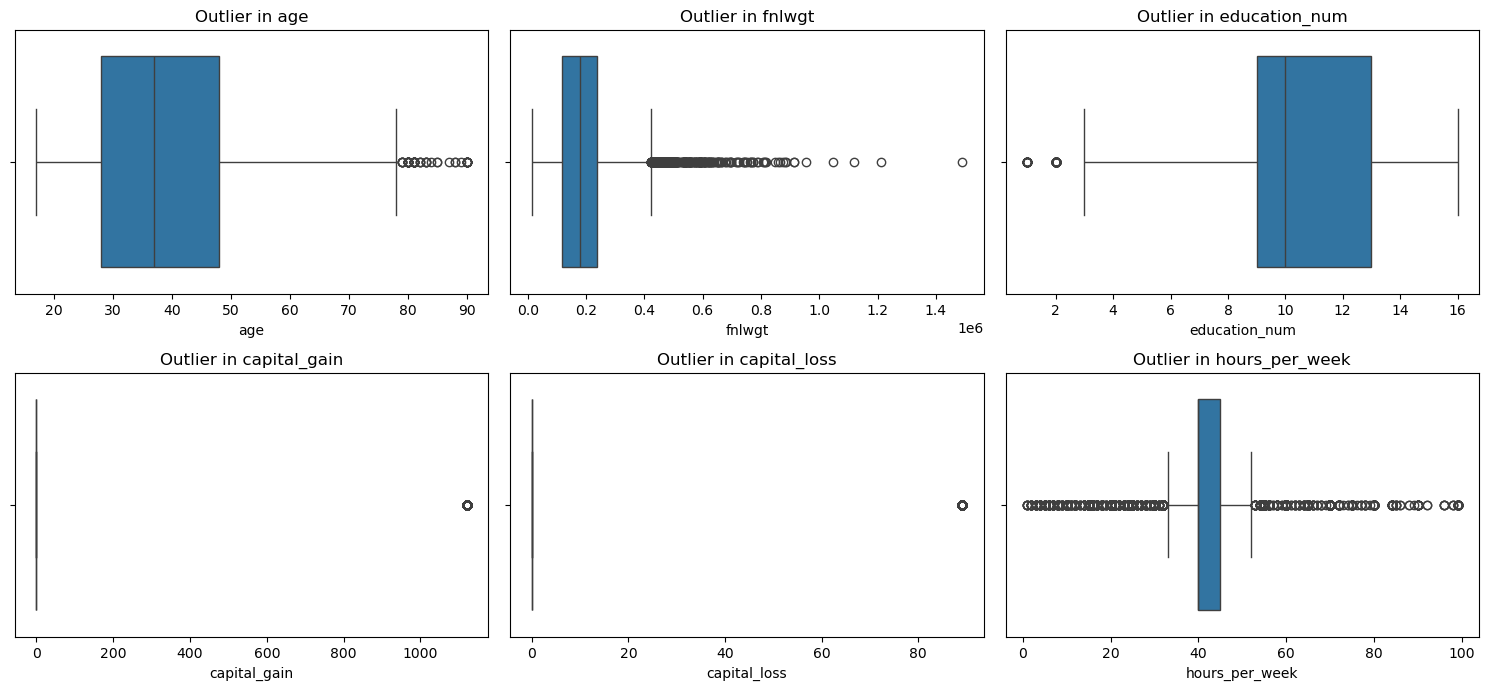

In [45]:
plot_outliers(test_df)

In [53]:
train_df.describe().round(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30139.00,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,92.03,4.19,40.93
std,13.13,105658.62,2.55,303.49,18.78,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117627.50,9.00,0.00,0.00,40.00
50%,37.00,178417.00,10.00,0.00,0.00,40.00
75%,47.00,237604.50,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,1092.84,88.44,99.00


In [54]:
test_df.describe().round(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15055.0,15055.0,15055.0,15055.00,15055.00,15055.0
mean,38.77,189623.4,10.11,93.20,4.22,40.95
std,13.38,105608.09,2.56,309.46,18.92,12.06
min,17.0,13492.0,1.0,0.00,0.00,1.0
25%,28.0,116657.0,9.0,0.00,0.00,40.0
50%,37.0,177955.0,10.0,0.00,0.00,40.0
75%,48.0,238589.5,13.0,0.00,0.00,45.0
max,90.0,1490400.0,16.0,1120.67,89.07,99.0


> In the imputation technique applied, outlier values will be replaced with the mean, as replacing them with the minimum or maximum bounds of the interquartile range (IQR) or with the median results in a lack of data distribution.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [47]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [48]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan untuk optimasi model clustering. Jika Anda menerapkan proses ini, maka silakan lakukan pembangunan model dan evaluasi menggunakan kolom hasil dari feature selection.

In [49]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [50]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [51]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.